# Deep Machine Learning

##### The architecture of Artificial Neural Networks draws inspiration from the human brain

##### The perceptron acts as a binary classifier and can perform complex classification tasks.

##### the notations that we would use in the future segments and modules.

<ol>
<li><b><i>W</i></b> is for weight matrix</li>
<li><b><i>b</i></b> shall stand for the bias</li>
<li><b><i>x</i></b> stands for input</li>
<li><b><i>y</i></b> is the ground truth label</li>
<li><b><i>p</i></b> is the probability vector of the predicted output</li>
<li><b><i>h</i></b> is the output of the hidden layers</li>
<li>superscript stands for layer number</li>
<li>subscript stands for the index of the individual neuron</li>
</ol>
You also were introduced to the most common activation functions such as sigmoid, relu, tanh and leaky relu. '''

Now in order explain how nural network work, lets use an example

##### Consider a sushi place you plan to visit on the coming Saturday. There are various factors that would affect this decision, such as:
<ol>
<li>How far is it?</li>

<li>How costly is it?</li>

<li>How many people are accompanying you?</li>

##### You take a decision based on multiple such factors. Also, each decision factor has a different ‘weight’ - for example, the distance of the place might be more important than the number of people. 

##### Perceptrons work in a similar way. They take some signals as inputs and perform a set of simple calculations to arrive at a decision.
##### Let’s study perceptrons in some detail.

##### the perceptron takes a <b><i>weighted sum</i></b> of multiple inputs (along with a <b>bias</b>) as the cumulative input
##### and applies a step function on the cumulative input, i.e. it returns <b>1</b> if the input is positive, else <b>-1</b>.

So, here the cumulative input will be <b><i>y</i></b> = <b><i>w</i></b><b><sup>T</sup> . </b><b><i>x</i></b> <b>+</b> <b><i>b</i></b>

and the step function is if <b><i>y</i></b> > 0 then 1 else 0

here <b><i>w</i></b> and <b><i>x</i></b> are refered to as a column vector

But in most of the new library they are represented as homogeneous coordinates

ie. <b><i>x</i></b> can be represented as [<b><i>x1</i></b>,<b><i>x2</i></b>,<b><i>x3</i></b>...., 1] here 1 is added for bais sake

and <b><i>w</i></b> can be represented as [<b><i>w1</i></b>, <b><i>w2</i></b>, <b><i>w3</i></b>..., <b><i>b</i></b>] here <b><i>b</i></b> is the bias term

In [2]:
import torch

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


##### Lets solve an example:

In [3]:
x = torch.tensor([1,2,3]); # x (input) is of size 1 row and 3 column

In [4]:
w = torch.tensor([4,5,6]); # w (weight) is of size 1 row and 3 column

In [5]:
b = 3; # b is the bias term

Now what is the value of <b><i>y</i></b> = <b><i>w</i></b><b><sup>T</sup> . </b><b><i>x</i></b> <b>+</b> <b><i>b</i></b>

In [6]:
y = torch.dot(w.t(), x) + b

In [7]:
cs = y.sum() # cumulative sum

In [8]:
# Step Function
if cs > 0 :
    print(1)
else:
    print(0)

1


##### Now lets solve the same problem using <b>Homogeneous Dimension</B>

In [9]:
x = torch.tensor([1,2,3,1]); # x (input) and 1 is homogeneous dimention is of size 1 row and 4 column

In [10]:
b = 3; # b is the bias term

In [11]:
w = torch.tensor([4,5,6, b]); # w (weight) and b (bias) is of size 1 row and 4 column

Now what is the value of <b><i>y</i></b> = <b><i>w</i></b><b><sup>T</sup> . </b><b><i>x</i></b>

In [12]:
y = torch.dot(w.t(), x) # the formula has change No bias term added

In [13]:
cs = y.sum() # cumulative sum

In [14]:
# Step Function
if cs > 0 :
    print(1)
else:
    print(0)

1


We can see that by using Homogeneous Dimension we represent y without adding b term

##### In the above example we have see how to solve the problem when w, x and b are given
##### but this never true for real world problem, only x and y are known, and we need to find out both w and b
##### So, in order to learn the weight and bias <i>Rosenblatt</i> suggested an elegant iterative solution to train the perceptron (i.e. to learn the weights):

####  Perceptron Learning Algorithm : <b><i>w</i></b><b><i><sub>t + 1</sub></i></b> = <b><i>w</i></b><b><i><sub>t</sub></i></b> + <b><i>y</i></b><b><i><sub>i<sub>t</sub></sub></i></b> . <b><i>x</i></b><b><i><sub>i<sub>t</sub></sub></i></b>

#### where <b><i>y</i></b><b><i><sub>i<sub>t</sub></sub></i></b> . <b><i>x</i></b><b><i><sub>i<sub>t</sub></sub></i></b> is the error term

Consider the following figure with 6 data points and the separator. These are represented by numbers on a scale. <br>
The blue points belong to class '-1' and the orange points belong to the class '+1'.

In [15]:
import pandas as pd

In [16]:
# initialize list of lists
data = [[1,0,1], [3,1,1], [4,2,1], [0,1,-1], [1,6,-1], [2,4,-1]]

In [17]:
TestData = pd.DataFrame(data, columns=["X1","X2","Y"])

In [18]:
TestData

,X1,X2,Y
0,1,0,1
1,3,1,1
2,4,2,1
3,0,1,-1
4,1,6,-1
5,2,4,-1


In [18]:
# lets create the nural network with self updating weight
import pandas as pd
import torch

# determine the supported device
def get_device():
    if torch.cuda.is_available():
        device = torch.device('cuda:0')
    else:
        device = torch.device('cpu') # don't have GPU 
    return device

# convert a df to tensor to be used in pytorch
def df_to_tensor(df, device):
    return torch.from_numpy(df.values).float().to(device)

def NeuralNetwork(df, feature, target):
    # Now lets add the Homogeneous coordinates
    df["HCoordinates"] = df.apply(lambda x: 1, axis = 1)
    feature.append("HCoordinates")
    # lets create x as feature set
    X = df[feature]
    # lets create y as target set
    Y = df[target]
    # determine the supported device
    device = get_device()
    # lets convert the dataframe to torch.tensor
    df_tensor = df_to_tensor(X, device)
    # lets define the initial weight
    w = torch.tensor([[3,-1,0]]).float()
    def updateWeight(w):
        # copy the calculation to cuda device
        wt = w.t().to(device)
        # predict the target sets
        y = torch.matmul(df_tensor, wt)
        # copy the y array to cpu device
        y = y.cpu().numpy()
        # create a new column with predicted result
        df["x_Dash"] = y
        # create a predicted column
        df["Y_Dash"] = (y > 1) * 1
        # update the ydash with other category
        df["Y_Dash"] = df["Y_Dash"].apply(lambda x: -1 if x == 0 else x)
        # create a error column
        df["error"] = df[target[0]] - df["Y_Dash"]
        # so the missed classifyed x term is
        x_error = df_to_tensor(df[feature][df.error != 0], device)
        # so the missed classifyed y term is
        y_error = df_to_tensor(df[target][df.error != 0], device)
        # so the initial weight w0 is
        w0 = w.to(device)
        # now the updated weight is
        w1 = w0 + (y_error * x_error)
        return w1
    w1 = updateWeight(w)
#     w2 = updateWeight(w1)
    return w1

In [79]:
# importing "copy" for copy operations
import copy

class NeuralNetTest:
    
    # Instance attribute
    def __init__(self, DataFrame, Feature, Target):
        self._dataframe = copy.deepcopy(DataFrame)
        self._feature = copy.deepcopy(Feature)
        self._target = copy.deepcopy(Target)
        # determine the supported device
        self._device = self.get_device()
        # weight matrix
        # lets define the initial weight
        self._weight = torch.tensor([[3,-1,0]]).float()
        # so the initial weight w0 is
        self.Weight = self._weight.to(self._device)
        
    # helper function
    # determine the supported device
    def get_device(self):
        if torch.cuda.is_available():
            device = torch.device('cuda:0')
        else:
            device = torch.device('cpu') # don't have GPU 
        return device

    # convert a df to tensor to be used in pytorch
    def df_to_tensor(self, DataFrame):
        return torch.from_numpy(DataFrame.values).float().to(self._device)
        
    # Initialize Input Parameters
    def InitInput(self):
         # Now lets add the Homogeneous coordinates
        self._dataframe["HCoordinates"] = self._dataframe.apply(lambda x: 1, axis = 1)
        self._feature.append("HCoordinates")
        # lets create x as feature set
        X = self._dataframe[self._feature]
        # lets convert the dataframe to torch.tensor
        df_tensor = self.df_to_tensor(X)
        return df_tensor
        
    # learning Function
    def StartLearning(self, DataFrameTensor):
        wsize = self.Weight.size()[1]
        ysize = DataFrameTensor.size()[0]
        if wsize == ysize:
            y = torch.matmul(self.Weight, DataFrameTensor)
        else:
            it = DataFrameTensor.transpose_(0,1)
            y = torch.matmul(self.Weight, it)
        # check the lenght of the y column
        column = y.size()[1]
        # copy the y array to cpu device
        y = y.cpu().numpy()
        # resize the numpy array
        y.resize(column,1)
        # lets copy the data frame first
        DF = copy.deepcopy(self._dataframe)
        # create a new column with predicted result
        DF["x_Dash"] = y
        # create a predicted column
        DF["Y_Dash"] = (y > 1) * 1
        # update the ydash with other category
        DF["Y_Dash"] = DF["Y_Dash"].apply(lambda x: -1 if x == 0 else x)
        # create a error column
        DF["error"] = DF[self._target[0]] - DF["Y_Dash"]
        # so the missed classifyed x term is
        x_error = self.df_to_tensor(DF[self._feature][DF.error != 0])
        # so the missed classifyed y term is
        y_error = self.df_to_tensor(DF[self._target][DF.error != 0])
        # now the updated weight is
        self.Weight = self.Weight + (y_error * x_error)
        return DF

In [19]:
NeuralNetwork(TestData, ["X1","X2"], ["Y"])

tensor([[ 1., -5., -1.]], device='cuda:0')

In [80]:
myLearningEx = NeuralNetTest(TestData, ["X1","X2"], ["Y"])

In [81]:
myDatasets = myLearningEx.InitInput()

In [82]:
myDatasets

tensor([[1., 0., 1.],
        [3., 1., 1.],
        [4., 2., 1.],
        [0., 1., 1.],
        [1., 6., 1.],
        [2., 4., 1.]], device='cuda:0')

In [83]:
myDatasetsLearn = myLearningEx.StartLearning(myDatasets)

In [84]:
myDatasetsLearn

,X1,X2,Y,HCoordinates,x_Dash,Y_Dash,error
0,1,0,1,1,3.0,1,0
1,3,1,1,1,8.0,1,0
2,4,2,1,1,10.0,1,0
3,0,1,-1,1,-1.0,-1,0
4,1,6,-1,1,-3.0,-1,0
5,2,4,-1,1,2.0,1,-2


In [85]:
myLearningEx.Weight

tensor([[ 1., -5., -1.]], device='cuda:0')

In [86]:
myDatasetsLearnSecond = myLearningEx.StartLearning(myDatasets)

In [87]:
myLearningEx.Weight

tensor([[ 2., -5.,  0.],
        [ 4., -4.,  0.],
        [ 5., -3.,  0.]], device='cuda:0')

In [88]:
myDatasetsLearnSecond

,X1,X2,Y,HCoordinates,x_Dash,Y_Dash,error
0,1,0,1,1,0.0,-1,2
1,3,1,1,1,-3.0,-1,2
2,4,2,1,1,-7.0,-1,2
3,0,1,-1,1,-6.0,-1,0
4,1,6,-1,1,-30.0,-1,0
5,2,4,-1,1,-19.0,-1,0


,Y
0,3.0
1,8.0
2,10.0
3,-1.0
4,-3.0
5,2.0


In [39]:
myDatasetsLearnSecond = myLearningEx.StartLearning(myDatasets)

In [60]:
myDatasetsLearnSecond

,X1,X2,Y,HCoordinates,x_Dash,Y_Dash,error
0,1,0,1,1,0.0,-1,2
1,3,1,1,1,-3.0,-1,2
2,4,2,1,1,-7.0,-1,2
3,0,1,-1,1,-6.0,-1,0
4,1,6,-1,1,-30.0,-1,0
5,2,4,-1,1,-19.0,-1,0


tensor([[ 3., -1.,  0.]], device='cuda:0')

In [20]:
# Now lets add the Homogeneous coordinates

TestData["HCoordinates"] = TestData.apply(lambda x: 1, axis = 1)

In [21]:
TestData

,X1,X2,Y,HCoordinates,x_Dash,Y_Dash,error
0,1,0,1,1,3.0,1,0
1,3,1,1,1,8.0,1,0
2,4,2,1,1,10.0,1,0
3,0,1,-1,1,-1.0,-1,0
4,1,6,-1,1,-3.0,-1,0
5,2,4,-1,1,2.0,1,-2


In [22]:
# lets create x as feature set
X = TestData[["X1","X2","HCoordinates"]]

In [23]:
# lets create y as target set
Y = TestData[["Y"]]

In [24]:
import pandas as pd
import torch

# determine the supported device
def get_device():
    if torch.cuda.is_available():
        device = torch.device('cuda:0')
    else:
        device = torch.device('cpu') # don't have GPU 
    return device

# convert a df to tensor to be used in pytorch
def df_to_tensor(df):
    device = get_device()
    return torch.from_numpy(df.values).float().to(device)

In [25]:
# lets convert the dataframe to torch.tensor
df_tensor = df_to_tensor(X)

In [26]:
df_tensor

tensor([[1., 0., 1.],
        [3., 1., 1.],
        [4., 2., 1.],
        [0., 1., 1.],
        [1., 6., 1.],
        [2., 4., 1.]], device='cuda:0')

In [27]:
# lets define the initial weight
w = torch.tensor([[3,-1,0]]).float()

In [28]:
# set device to cuda
device = torch.device('cuda:0')

In [29]:
# copy the calculation to cuda device
wt = w.t().to(device)

In [30]:
# predict the target sets
y = torch.matmul(df_tensor, wt)

In [31]:
y

tensor([[ 3.],
        [ 8.],
        [10.],
        [-1.],
        [-3.],
        [ 2.]], device='cuda:0')

In [32]:
# apply the activation function here perceptron
(y > 1) * 1

tensor([[1],
        [1],
        [1],
        [0],
        [0],
        [1]], device='cuda:0')

In [33]:
# copy the y array to cpu device
y = y.cpu().numpy()

In [34]:
# create a new column with predicted result
TestData["x_Dash"] = y

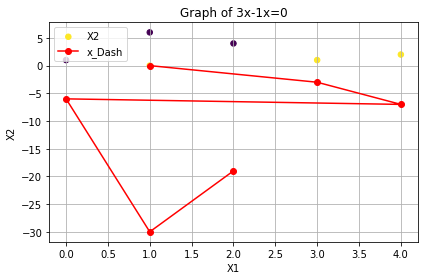

In [42]:
# visualize the first iteration of the seperating line for two category 
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
plt.scatter('X1', 'X2', c='Y', s=30, data=myDatasetsLearnSecond)
plt.plot('X1', 'x_Dash', "r-o", data=myDatasetsLearnSecond);
plt.title('Graph of 3x-1x=0')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [36]:
# create a predicted column
TestData["Y_Dash"] = (y > 1) * 1

In [37]:
TestData["Y_Dash"] = TestData["Y_Dash"].apply(lambda x: -1 if x == 0 else x)

In [38]:
TestData["error"] = TestData["Y"] - TestData["Y_Dash"]

In [39]:
TestData

,X1,X2,Y,HCoordinates,x_Dash,Y_Dash,error
0,1,0,1,1,3.0,1,0
1,3,1,1,1,8.0,1,0
2,4,2,1,1,10.0,1,0
3,0,1,-1,1,-1.0,-1,0
4,1,6,-1,1,-3.0,-1,0
5,2,4,-1,1,2.0,1,-2


In [40]:
# so the error term is
x_error = df_to_tensor(TestData[["X1","X2","HCoordinates"]][TestData.error != 0])

In [41]:
# so the y term is
y_error = df_to_tensor(TestData[["Y"]][TestData.error != 0])

In [42]:
y_error

tensor([[-1.]], device='cuda:0')

In [43]:
x_error

tensor([[2., 4., 1.]], device='cuda:0')

In [44]:
w0 = w.to(device)

In [45]:
w3  = w0 + (y_error * x_error)

tensor([[  0.,  -3.,  -7.,  -6., -30., -19.]], device='cuda:0')

In [46]:
# copy the calculation to cuda device
w2 = w3.t().to(device)

In [47]:
# predict the target sets
y1 = torch.matmul(df_tensor, w2)

In [48]:
# copy the y array to cpu device
y1 = y1.cpu().numpy()

In [49]:
# create a new column with predicted result
TestData["x_Dash"] = y1

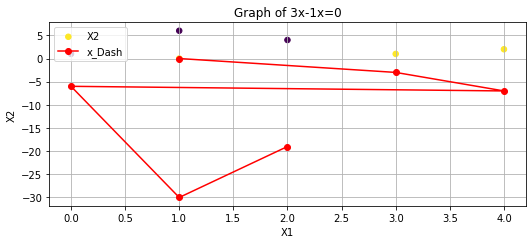

In [50]:
# visualize the first iteration of the seperating line for two category 
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
plt.scatter('X1', 'X2', c='Y', s=30, data=TestData)
plt.plot('X1', 'x_Dash', "r-o", data=TestData);
plt.title('Graph of 3x-1x=0')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [51]:
# apply the activation function here perceptron
y1

array([[  0.],
       [ -3.],
       [ -7.],
       [ -6.],
       [-30.],
       [-19.]], dtype=float32)